In [58]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data preparation

In [59]:
california_dataset = datasets.fetch_california_housing()

In [60]:
df = pd.DataFrame(california_dataset.data, columns=california_dataset.feature_names)
df.insert(df.shape[1], 'Target', california_dataset.target, True)

In [61]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Heatmap to check correlations of features

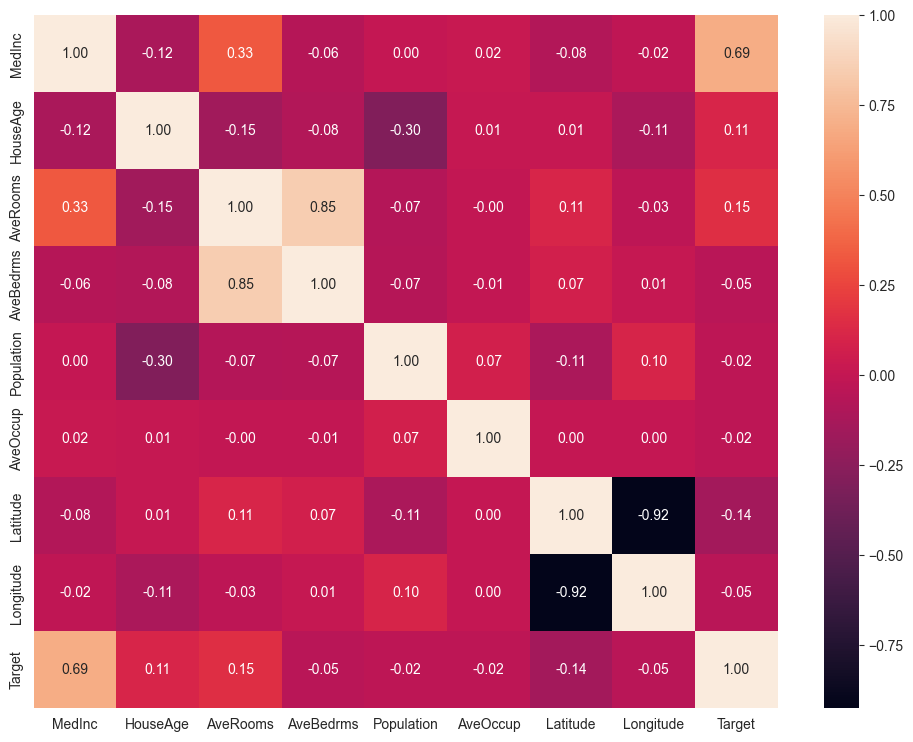

In [62]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df.corr(), fmt=".2f", annot=True)
plt.show()

Feature engineering

In [63]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [65]:
scaler = StandardScaler()

In [66]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear model

In [67]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

linear_mse = mean_squared_error(y_test, model.predict(X_test))
linear_r2 = r2_score(y_test, model.predict(X_test))

print(f'Linear MSE: {linear_mse}')
print(f'Ridge R2: {linear_r2}')

Linear MSE: 0.5367808835096929
Ridge R2: 0.5904023810375134


L2 Ridge model

In [68]:
alpha = 2
ridge_model = linear_model.Ridge(alpha)
ridge_model.fit(X_train, y_train)

ridge_mse = mean_squared_error(y_test, ridge_model.predict(X_test))
ridge_r2 = r2_score(y_test, ridge_model.predict(X_test))

print(f'Ridge MSE: {ridge_mse}')
print(f'Ridge R2: {ridge_r2}')

Ridge MSE: 0.5367698634358157
Ridge R2 Score: 0.5904107900478927


XGBoost Linear Regressor model

In [69]:
xg_model = XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=1000, learning_rate=0.1)
xg_model.fit(X_train, y_train)

xg_mse = mean_squared_error(y_test, xg_model.predict(X_test))
xg_r2 = r2_score(y_test, xg_model.predict(X_test))

print(f'XGB MSE: {xg_mse}')
print(f'XGB R2: {xg_r2}')

XGB MSE: 0.19974858323383557
XGB R2: 0.8475792514279586


SVR model

In [70]:
svr = SVR(C=5.0, epsilon=.2)
svr.fit(X_train, y_train)

print('SVR MSE: ', mean_squared_error(y_test, svr.predict(X_test)))
print('SVR R2: ',r2_score(y_test, svr.predict(X_test))) 

SVR MSE:  0.3261496863985579
SVR R2:  0.7511272493522048
